In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-07-10 21:48:48.130461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 211s 1us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

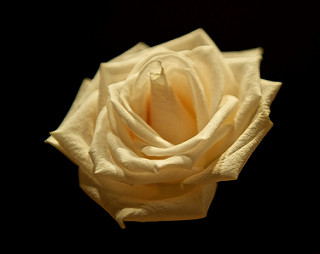

In [16]:
PIL.Image.open(str(roses[11]))

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img.shape

(243, 500, 3)

In [21]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
X

array([[[[  2,   0,   2],
         [ 10,   5,   1],
         [ 89,  85,  97],
         ...,
         [244, 245, 243],
         [244, 245, 243],
         [244, 245, 243]],

        [[ 14,  33,  73],
         [  6,   1,   2],
         [ 92,  90, 105],
         ...,
         [243, 244, 242],
         [244, 245, 243],
         [243, 244, 242]],

        [[122, 176, 224],
         [ 10,   1,   2],
         [ 72,  80,  84],
         ...,
         [244, 245, 243],
         [244, 245, 243],
         [244, 245, 243]],

        ...,

        [[147, 109,  85],
         [145, 109,  85],
         [144, 108,  84],
         ...,
         [155, 122,  96],
         [152, 121,  95],
         [149, 118,  93]],

        [[148, 114,  91],
         [154, 120,  96],
         [146, 112,  88],
         ...,
         [155, 125,  98],
         [153, 121,  95],
         [152, 122,  93]],

        [[153, 119,  96],
         [151, 117,  93],
         [152, 117,  94],
         ...,
         [154, 124,  97],
        

In [25]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Building the model and training it on original data

In [28]:
num_classes = 5

In [29]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 31s 346ms/step - loss: 1.2670 - accuracy: 0.4778
Epoch 2/30
86/86 [==============================] - 31s 360ms/step - loss: 0.9705 - accuracy: 0.6217
Epoch 3/30
86/86 [==============================] - 30s 354ms/step - loss: 0.8002 - accuracy: 0.6940
Epoch 4/30
86/86 [==============================] - 30s 346ms/step - loss: 0.5875 - accuracy: 0.7798
Epoch 5/30
86/86 [==============================] - 30s 353ms/step - loss: 0.3833 - accuracy: 0.8656
Epoch 6/30
86/86 [==============================] - 34s 398ms/step - loss: 0.2176 - accuracy: 0.9291
Epoch 7/30
86/86 [==============================] - 28s 330ms/step - loss: 0.1380 - accuracy: 0.9615
Epoch 8/30
86/86 [==============================] - 30s 353ms/step - loss: 0.0627 - accuracy: 0.9815
Epoch 9/30
86/86 [==============================] - 30s 353ms/step - loss: 0.0337 - accuracy: 0.9909
Epoch 10/30
86/86 [==============================] - 30s 344ms/step - loss: 0.0594 - accura

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 98ms/step - loss: 2.6959 - accuracy: 0.6580


[2.6958796977996826, 0.657952070236206]

In [33]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 3s 98ms/step


array([[ -7.1736665 ,  12.550281  ,  -0.7559645 ,  -6.224094  ,
         -6.7836475 ],
       [  8.678999  ,  -2.3100407 ,  -7.583733  ,  -3.119317  ,
          5.650525  ],
       [  1.6659131 , -11.024081  ,  12.331276  ,   2.5871024 ,
         -4.3805513 ],
       ...,
       [-10.352689  ,  -0.41140783,   1.8087176 ,  11.262461  ,
         -5.0897512 ],
       [ 11.92158   ,   1.4688345 ,  -5.612199  , -11.105984  ,
          3.2312524 ],
       [ -7.598522  , -23.84107   ,  -0.6377791 ,  20.66221   ,
          0.9582178 ]], dtype=float32)

In [34]:
score = tf.nn.softmax(predictions[0])

In [37]:
print(score)

tf.Tensor([2.7164251e-09 9.9999833e-01 1.6640661e-06 7.0208914e-09 4.0121892e-09], shape=(5,), dtype=float32)


### Catch:

Since the accuracy is very high for the training data and relatively low for the test data, the model is overfitting!

To overcome this, we need more data, but we do not have it. hence, we will perform data augmentation, which means we modify the images in the currrent data (resize, zoom, rotate, skew, scale, etc.) to vreate more training examples.

# Data Autmentation

Some keras layers funtions that can be added for data augmentation are:

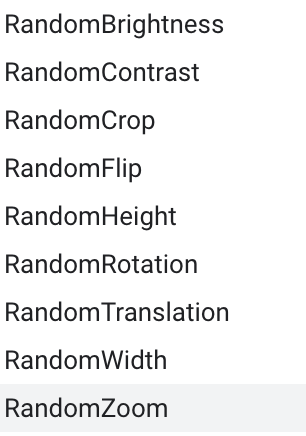

Link: https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomBrightness

In [43]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

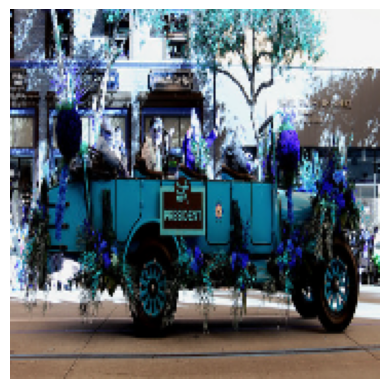

In [39]:
plt.axis('off')
plt.imshow(X[0])

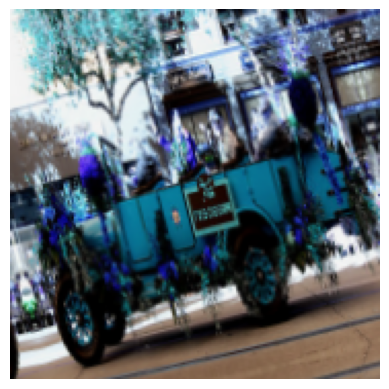

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [41]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 38s 427ms/step - loss: 1.2702 - accuracy: 0.4760
Epoch 2/30
86/86 [==============================] - 37s 427ms/step - loss: 1.0116 - accuracy: 0.6068
Epoch 3/30
86/86 [==============================] - 35s 410ms/step - loss: 0.9278 - accuracy: 0.6348
Epoch 4/30
86/86 [==============================] - 37s 429ms/step - loss: 0.8612 - accuracy: 0.6766
Epoch 5/30
86/86 [==============================] - 39s 454ms/step - loss: 0.8147 - accuracy: 0.6919
Epoch 6/30
86/86 [==============================] - 38s 439ms/step - loss: 0.7642 - accuracy: 0.7057
Epoch 7/30
86/86 [==============================] - 39s 457ms/step - loss: 0.7334 - accuracy: 0.7242
Epoch 8/30
86/86 [==============================] - 38s 445ms/step - loss: 0.7049 - accuracy: 0.7318
Epoch 9/30
86/86 [==============================] - 37s 435ms/step - loss: 0.6758 - accuracy: 0.7485
Epoch 10/30
86/86 [==============================] - 38s 445ms/step - loss: 0.6312 - accura

In [44]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 90ms/step - loss: 0.8939 - accuracy: 0.7266


[0.8939127922058105, 0.7265795469284058]